In [0]:
import pandas as pd
import numpy as np
from random import *

In [0]:
df_label = pd.read_csv('xqrs_v2_cleaned.csv')

In [49]:
df_label.head()

,Unnamed: 0,Set,Categorie Montage,Dossier Patient,Patient,Session,File N°,exam_duration,SWT_vs_XQRS,Pan_vs_XQRS,interval_index,interval_start_time,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label,cle_exam,max_duration,mean_nni%,csi%,hf%
0,193,train,01_tcp_ar,86,8643,s002_2012_02_22,t005,300,0.977827,0.795613,0.0,0.0,665.457589,1.942364,1.532157,0.0,0.0,0.0,0.000000,1.532157,664.06250,3.90625,0.002302,0.002919,90.164234,90.352941,89.824561,0.253177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005,29.0,100.0,76.666667,46.666667
1,194,train,01_tcp_ar,86,8643,s002_2012_02_22,t005,300,0.977827,0.795613,1.0,10000.0,672.135417,11.762073,11.504201,0.0,0.0,1.0,6.666667,11.718750,675.78125,46.87500,0.017435,0.017500,89.294479,94.814815,88.275862,1.582749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005,29.0,100.0,76.666667,46.666667
2,195,train,01_tcp_ar,86,8643,s002_2012_02_22,t005,300,0.977827,0.795613,2.0,20000.0,657.031250,10.460751,9.002380,0.0,0.0,1.0,6.666667,9.511195,660.15625,42.96875,0.014476,0.015921,91.342484,96.603774,90.352941,1.471285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005,29.0,100.0,76.666667,46.666667
3,196,train,01_tcp_ar,86,8643,s002_2012_02_22,t005,300,0.977827,0.795613,3.0,30000.0,660.677083,2.499767,1.786586,0.0,0.0,0.0,0.000000,1.808242,660.15625,7.81250,0.002737,0.003784,90.817138,91.428571,90.352941,0.332091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005,29.0,100.0,76.666667,46.666667
4,197,train,01_tcp_ar,86,8643,s002_2012_02_22,t005,300,0.977827,0.795613,4.0,40000.0,663.330078,6.723404,2.240189,0.0,0.0,0.0,0.000000,2.470529,664.06250,15.62500,0.003724,0.010136,90.461400,91.428571,89.302326,0.885948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005,29.0,100.0,76.666667,46.666667


In [50]:
df_label['Patient']

0         8643
1         8643
2         8643
3         8643
4         8643
          ... 
223957    4671
223958    4671
223959    4671
223960    4671
223961    4671
Name: Patient, Length: 223962, dtype: int64

In [0]:
s_r = pd.Series(df_label['Patient'])

In [0]:
l_r = s_r.values.tolist()

In [0]:
l_random =  sample(l_r, 20)

In [54]:
l_random

[3988,
 10489,
 8544,
 4671,
 6139,
 8889,
 8615,
 11596,
 6514,
 11077,
 10158,
 8480,
 10736,
 4041,
 8345,
 11870,
 11149,
 2348,
 17,
 3437]

In [0]:
df_label_work = df_label[df_label['Patient'].isin(l_random)]

In [56]:
df_label_work

,Unnamed: 0,Set,Categorie Montage,Dossier Patient,Patient,Session,File N°,exam_duration,SWT_vs_XQRS,Pan_vs_XQRS,interval_index,interval_start_time,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label,cle_exam,max_duration,mean_nni%,csi%,hf%
30,1019,train,01_tcp_ar,86,8615,s001_2012_01_13,t000,1248,0.936851,0.890695,0.0,0.0,1216.000000,20.283702,22.395335,1.0,12.5,1.0,12.5,22.978251,1224.0,64.0,0.018897,0.016681,49.354383,51.194539,48.543689,7.869494e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8615_s001_2012_01_13_t000,124.0,98.4,90.400000,76.000000
31,1020,train,01_tcp_ar,86,8615,s001_2012_01_13,t000,1248,0.936851,0.890695,1.0,10000.0,1226.500000,14.010200,8.201543,0.0,0.0,0.0,0.0,9.680614,1236.0,36.0,0.007893,0.011423,48.925332,50.000000,48.543689,5.280349e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8615_s001_2012_01_13_t000,124.0,98.4,90.400000,76.000000
32,1021,train,01_tcp_ar,86,8615,s001_2012_01_13,t000,1248,0.936851,0.890695,2.0,20000.0,1213.000000,17.856571,16.482520,0.0,0.0,2.0,25.0,17.104719,1212.0,60.0,0.014101,0.014721,49.473557,50.847458,48.387097,6.840720e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8615_s001_2012_01_13_t000,124.0,98.4,90.400000,76.000000
33,1022,train,01_tcp_ar,86,8615,s001_2012_01_13,t000,1248,0.936851,0.890695,3.0,30000.0,1184.000000,24.842360,16.243052,0.0,0.0,1.0,12.5,17.037773,1186.0,72.0,0.014390,0.020982,50.695392,52.631579,49.504950,1.004771e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8615_s001_2012_01_13_t000,124.0,98.4,90.400000,76.000000
34,1023,train,01_tcp_ar,86,8615,s001_2012_01_13,t000,1248,0.936851,0.890695,4.0,40000.0,1169.333333,8.000000,8.000000,0.0,0.0,0.0,0.0,8.000000,1164.0,16.0,0.006842,0.006842,51.313414,51.546392,50.847458,3.294807e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8615_s001_2012_01_13_t000,124.0,98.4,90.400000,76.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223957,308940,dev,02_tcp_le,46,4671,s005_2010_09_20,t001,1220,1.000000,1.000000,117.0,1170000.0,525.473684,1.982379,0.916246,0.0,0.0,0.0,0.0,0.942809,524.0,4.0,0.001794,0.003773,114.184229,114.503817,113.636364,4.184389e-01,11.091962,1.062998,8.230032,10.434598,8.199485,2.436866,388.251432,0.433293,1.443710,11.837678,8.199485,0.0,dev_02_tcp_le_4671_s005_2010_09_20_t001,121.0,100.0,94.262295,86.885246
223958,308941,dev,02_tcp_le,46,4671,s005_2010_09_20,t001,1220,1.000000,1.000000,118.0,1180000.0,524.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,524.0,0.0,0.000000,0.000000,114.503817,114.503817,114.503817,1.421085e-14,9.152304,1.224314,24.660710,7.475457,8.156070,2.369910,356.595885,0.354601,1.340153,10.930383,8.156070,0.0,dev_02_tcp_le_4671_s005_2010_09_20_t001,121.0,100.0,94.262295,86.885246
223959,308942,dev,02_tcp_le,46,4671,s005_2010_09_20,t001,1220,1.000000,1.000000,119.0,1190000.0,528.000000,2.981424,1.885618,0.0,0.0,0.0,0.0,1.885618,528.0,8.0,0.003571,0.005647,113.639796,114.503817,112.781955,6.245934e-01,4.562690,0.861958,8.318826,5.293405,9.782922,2.304168,434.296810,0.187326,1.134461,11.098341,9.782922,0.0,dev_02_tcp_le_4671_s005_2010_09_20_t001,121.0,100.0,94.262295,86.885246
223960,308943,dev,02_tcp_le,46,4671,s005_2010_09_20,t001,1220,1.000000,1.000000,120.0,1200000.0,555.111111,11.023445,3.049760,0.0,0.0,0.0,0.0,3.360672,560.0,28.0,0.006054,0.019858,108.127022,111.111111,105.633803,2.101548e+00,9.082972,1.413336,28.909886,6.426618,6.653388,2.054814,182.797907,0.211488,1.032347,6.868603,6.653388,0.0,dev_02_tcp_le_4671_s005_2010_09_20_t001,121.0,100.0,94.262295,86.885246


In [0]:
df_label_def = df_label_work.drop(['Unnamed: 0','Set','Categorie Montage','Dossier Patient','File N°','exam_duration','Pan_vs_XQRS','SWT_vs_XQRS','Session','max_duration','mean_nni%','csi%','hf%'],axis=1)

In [58]:
df_label_def

,Patient,interval_index,interval_start_time,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label,cle_exam
30,8615,0.0,0.0,1216.000000,20.283702,22.395335,1.0,12.5,1.0,12.5,22.978251,1224.0,64.0,0.018897,0.016681,49.354383,51.194539,48.543689,7.869494e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8615_s001_2012_01_13_t000
31,8615,1.0,10000.0,1226.500000,14.010200,8.201543,0.0,0.0,0.0,0.0,9.680614,1236.0,36.0,0.007893,0.011423,48.925332,50.000000,48.543689,5.280349e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8615_s001_2012_01_13_t000
32,8615,2.0,20000.0,1213.000000,17.856571,16.482520,0.0,0.0,2.0,25.0,17.104719,1212.0,60.0,0.014101,0.014721,49.473557,50.847458,48.387097,6.840720e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8615_s001_2012_01_13_t000
33,8615,3.0,30000.0,1184.000000,24.842360,16.243052,0.0,0.0,1.0,12.5,17.037773,1186.0,72.0,0.014390,0.020982,50.695392,52.631579,49.504950,1.004771e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8615_s001_2012_01_13_t000
34,8615,4.0,40000.0,1169.333333,8.000000,8.000000,0.0,0.0,0.0,0.0,8.000000,1164.0,16.0,0.006842,0.006842,51.313414,51.546392,50.847458,3.294807e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8615_s001_2012_01_13_t000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223957,4671,117.0,1170000.0,525.473684,1.982379,0.916246,0.0,0.0,0.0,0.0,0.942809,524.0,4.0,0.001794,0.003773,114.184229,114.503817,113.636364,4.184389e-01,11.091962,1.062998,8.230032,10.434598,8.199485,2.436866,388.251432,0.433293,1.443710,11.837678,8.199485,0.0,dev_02_tcp_le_4671_s005_2010_09_20_t001
223958,4671,118.0,1180000.0,524.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,524.0,0.0,0.000000,0.000000,114.503817,114.503817,114.503817,1.421085e-14,9.152304,1.224314,24.660710,7.475457,8.156070,2.369910,356.595885,0.354601,1.340153,10.930383,8.156070,0.0,dev_02_tcp_le_4671_s005_2010_09_20_t001
223959,4671,119.0,1190000.0,528.000000,2.981424,1.885618,0.0,0.0,0.0,0.0,1.885618,528.0,8.0,0.003571,0.005647,113.639796,114.503817,112.781955,6.245934e-01,4.562690,0.861958,8.318826,5.293405,9.782922,2.304168,434.296810,0.187326,1.134461,11.098341,9.782922,0.0,dev_02_tcp_le_4671_s005_2010_09_20_t001
223960,4671,120.0,1200000.0,555.111111,11.023445,3.049760,0.0,0.0,0.0,0.0,3.360672,560.0,28.0,0.006054,0.019858,108.127022,111.111111,105.633803,2.101548e+00,9.082972,1.413336,28.909886,6.426618,6.653388,2.054814,182.797907,0.211488,1.032347,6.868603,6.653388,0.0,dev_02_tcp_le_4671_s005_2010_09_20_t001


In [0]:
df_RF = df_label_def.replace([np.inf, -np.inf], np.nan)

In [0]:
df_RF = df_RF.groupby(df_RF['cle_exam']).transform(lambda x: x.fillna(x.mean()))

In [61]:
df_RF

,Patient,interval_index,interval_start_time,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label
30,8615,0.0,0.0,1216.000000,20.283702,22.395335,1.0,12.5,1.0,12.5,22.978251,1224.0,64.0,0.018897,0.016681,49.354383,51.194539,48.543689,7.869494e-01,338.905125,38.011644,392.358884,10.107745,3.966822,3.827936,1157.348288,0.894601,11.700677,48.441151,3.966822,0.0
31,8615,1.0,10000.0,1226.500000,14.010200,8.201543,0.0,0.0,0.0,0.0,9.680614,1236.0,36.0,0.007893,0.011423,48.925332,50.000000,48.543689,5.280349e-01,338.905125,38.011644,392.358884,10.107745,3.966822,3.827936,1157.348288,0.894601,11.700677,48.441151,3.966822,0.0
32,8615,2.0,20000.0,1213.000000,17.856571,16.482520,0.0,0.0,2.0,25.0,17.104719,1212.0,60.0,0.014101,0.014721,49.473557,50.847458,48.387097,6.840720e-01,338.905125,38.011644,392.358884,10.107745,3.966822,3.827936,1157.348288,0.894601,11.700677,48.441151,3.966822,0.0
33,8615,3.0,30000.0,1184.000000,24.842360,16.243052,0.0,0.0,1.0,12.5,17.037773,1186.0,72.0,0.014390,0.020982,50.695392,52.631579,49.504950,1.004771e+00,338.905125,38.011644,392.358884,10.107745,3.966822,3.827936,1157.348288,0.894601,11.700677,48.441151,3.966822,0.0
34,8615,4.0,40000.0,1169.333333,8.000000,8.000000,0.0,0.0,0.0,0.0,8.000000,1164.0,16.0,0.006842,0.006842,51.313414,51.546392,50.847458,3.294807e-01,338.905125,38.011644,392.358884,10.107745,3.966822,3.827936,1157.348288,0.894601,11.700677,48.441151,3.966822,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223957,4671,117.0,1170000.0,525.473684,1.982379,0.916246,0.0,0.0,0.0,0.0,0.942809,524.0,4.0,0.001794,0.003773,114.184229,114.503817,113.636364,4.184389e-01,11.091962,1.062998,8.230032,10.434598,8.199485,2.436866,388.251432,0.433293,1.443710,11.837678,8.199485,0.0
223958,4671,118.0,1180000.0,524.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,524.0,0.0,0.000000,0.000000,114.503817,114.503817,114.503817,1.421085e-14,9.152304,1.224314,24.660710,7.475457,8.156070,2.369910,356.595885,0.354601,1.340153,10.930383,8.156070,0.0
223959,4671,119.0,1190000.0,528.000000,2.981424,1.885618,0.0,0.0,0.0,0.0,1.885618,528.0,8.0,0.003571,0.005647,113.639796,114.503817,112.781955,6.245934e-01,4.562690,0.861958,8.318826,5.293405,9.782922,2.304168,434.296810,0.187326,1.134461,11.098341,9.782922,0.0
223960,4671,120.0,1200000.0,555.111111,11.023445,3.049760,0.0,0.0,0.0,0.0,3.360672,560.0,28.0,0.006054,0.019858,108.127022,111.111111,105.633803,2.101548e+00,9.082972,1.413336,28.909886,6.426618,6.653388,2.054814,182.797907,0.211488,1.032347,6.868603,6.653388,0.0


In [0]:
df_RF['label'] = df_RF['label'].apply(lambda x: "1" if (x!=0) else  "0" )


In [63]:
df_RF['label']

30        0
31        0
32        0
33        0
34        0
         ..
223957    0
223958    0
223959    0
223960    0
223961    0
Name: label, Length: 26842, dtype: object

In [0]:
a = pd.Series(df_RF['label'])

In [65]:
a.value_counts()

0    24623
1     2219
Name: label, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
X = df_RF.iloc[:, :-1]
y = df_RF.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)

In [0]:
from sklearn.preprocessing import StandardScaler

numeric_transformer = StandardScaler()

X_train = numeric_transformer.fit_transform(X_train)

In [68]:
X_train

array([[-0.53577279,  1.07236363,  1.07236363, ..., -0.59977065,
        -0.68593258, -0.44412611],
       [-1.18145146,  1.79911367,  1.79911367, ..., -0.15042414,
         1.3486402 ,  2.84773705],
       [-0.53577279, -0.15907394, -0.15907394, ..., -0.35487479,
        -0.60832293, -0.95353432],
       ...,
       [ 1.3406542 ,  1.73855117,  1.73855117, ..., -0.62868127,
        -0.78378103, -1.02675964],
       [-0.53577279,  0.6080511 ,  0.6080511 , ..., -0.51781959,
        -0.6944049 , -0.88858151],
       [-1.61377239,  0.12355107,  0.12355107, ...,  0.40333048,
        -0.04765253, -0.84408483]])

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=50)
rf_classifier.fit(X_train, y_train)
rf_classifier.score(X_train, y_train)

0.9998403321092129

In [0]:
from sklearn.model_selection import GridSearchCV
rf_classifier_grid = RandomForestClassifier()
params = {"n_estimators": range(20, 50)}

classifier = GridSearchCV(cv=10, estimator = rf_classifier_grid, param_grid = params).fit(X_train, y_train)

In [71]:
classifier.best_params_

{'n_estimators': 43}

In [0]:
X_test = numeric_transformer.fit_transform(X_test)

In [73]:
classifier.best_estimator_.score(X_test, y_test)

0.9334409536818576

In [97]:
y_pred = classifier.predict(X_test)
print(y_pred)

['0' '0' '0' ... '0' '1' '0']


In [103]:
type(y_pred)

numpy.ndarray

In [75]:
print(y_test)

34843     1
56316     0
42690     0
74336     0
74416     0
         ..
36468     0
42331     0
85818     1
184621    1
223730    0
Name: label, Length: 8053, dtype: object


In [104]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred,average='binary',pos_label='1')

0.3557692307692307

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

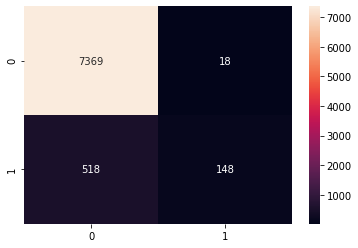

In [78]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d")

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      7387
           1       0.89      0.22      0.36       666

   micro avg       0.93      0.93      0.93      8053
   macro avg       0.91      0.61      0.66      8053
weighted avg       0.93      0.93      0.91      8053



/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:565: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


In [0]:
df_age_gender_by_patient = pd.read_csv("age_gender_by_patient.csv")

In [0]:
df_work_random = df_age_gender_by_patient[df_age_gender_by_patient['Patient'].isin(l_random)]

In [0]:
A_random = df_work_random['Age'].transform(lambda x: x.fillna(x.mean()))

In [86]:
A_random.mean()

48.11764705882353

In [87]:
A_random.median()

49.55882352941177

In [0]:
df_rg = df_work_random['Genre']

In [0]:
df_rg = df_rg.apply(lambda x: 1 if (x in ['male','gentleman']) else 0 )

In [0]:
rg = pd.Series(df_rg)

In [91]:
rg.value_counts()

0    13
1     5
Name: Genre, dtype: int64

In [0]:
df_frequency = pd.read_csv("finalxqrsMSTD.csv")

In [0]:
df_frequency_random = df_frequency[df_frequency['Patient'].isin(l_random)]

In [95]:
df_frequency_random['crisis_frequency'].mean()

0.05918519881763127